In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("collaborative/titles.csv")

In [4]:
df.head()

,movie_id,title
0,139,Target (1995)
1,568,Bhaji on the Beach (1993)
2,1900,Children of Heaven The (Bacheha-Ye Aseman) (1...
3,2284,Bandit Queen (1994)
4,5985,Asoka (Ashoka the Great) (2001)


In [5]:
rating = pd.read_csv("collaborative/ratings.csv")

In [6]:
rating.head()

,user_id,movie_id,rating,timestamp
0,172,94969,5.0,1396067836
1,172,98956,4.0,1396067879
2,176,73881,4.0,1499807147
3,221,1900,4.5,1288550866
4,333,33688,4.0,1412015122


In [7]:
df = pd.merge(df,rating,on="movie_id")
df.head()

,movie_id,title,user_id,rating,timestamp
0,139,Target (1995),9064,2.0,1053924583
1,139,Target (1995),21014,4.0,974580501
2,139,Target (1995),21535,3.5,1151778899
3,139,Target (1995),23292,3.0,942056670
4,139,Target (1995),23455,3.0,832137273


In [9]:
df['title'].value_counts()

3 Idiots (2009)                                       1394
Children of Heaven  The (Bacheha-Ye Aseman) (1997)     900
Namesake  The (2006)                                   581
Bhaji on the Beach (1993)                              396
PK (2014)                                              392
                                                      ... 
Elaan (2005)                                             1
Aashiq Banaya Aapne (2005)                               1
Johnny Gaddaar (2007)                                    1
Baton Baton Mein (1979)                                  1
Bandh Darwaza (1990)                                     1
Name: title, Length: 779, dtype: int64

In [10]:
df.shape

(17604, 5)

In [11]:
df.isnull().sum()

movie_id     0
title        0
user_id      0
rating       0
timestamp    0
dtype: int64

In [12]:
#plot analysis 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [13]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Shor in the City (2011)             5.00
Hooligan (1998)                     5.00
Humpty Sharma Ki Dulhania (2014)    5.00
Samay: When Time Strikes (2003)     5.00
Hichki (2018)                       4.75
Name: rating, dtype: float64

In [14]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
3 Idiots (2009)                                       1394
Children of Heaven  The (Bacheha-Ye Aseman) (1997)     900
Namesake  The (2006)                                   581
Bhaji on the Beach (1993)                              396
PK (2014)                                              392
Name: rating, dtype: int64

In [15]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())

In [16]:
ratings.head()

,rating
title,
100 Days (1991),1.000
1920 (2008),3.000
1920: Evil Returns (2012),2.000
1942: A Love Story (1994),2.500
2 States (2014),3.125


In [17]:
ratings['no. of ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())

In [18]:
ratings.head()

,rating,no. of ratings
title,,
100 Days (1991),1.000,1
1920 (2008),3.000,10
1920: Evil Returns (2012),2.000,5
1942: A Love Story (1994),2.500,5
2 States (2014),3.125,16


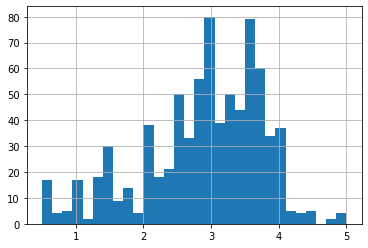

In [21]:
ratings['rating'].hist(bins=30)

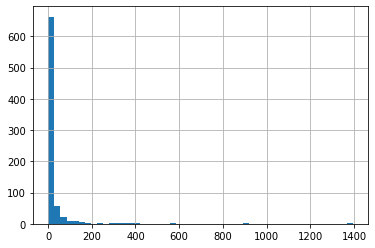

In [25]:
ratings['no. of ratings'].hist(bins=50)

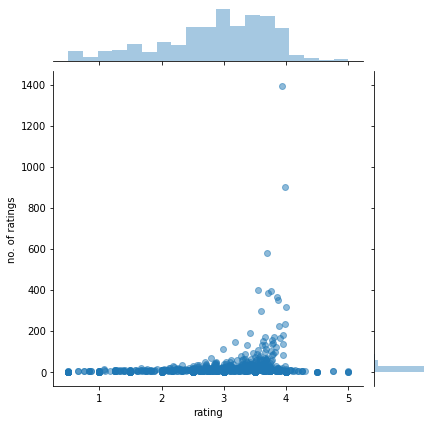

In [26]:
sns.jointplot(x='rating',y='no. of ratings',data=ratings,alpha=0.5)

In [28]:
#creating a pivot table 
movie = df.pivot_table(index='user_id',columns='title',values='rating')

In [29]:
movie

title,100 Days (1991),1920 (2008),1920: Evil Returns (2012),1942: A Love Story (1994),2 States (2014),3 A.M (2014),3 Idiots (2009),36 China Town (2006),404: Error Not Found (2011),7 Khoon Maaf (2011),...,Youngistaan (2014),Yuva (2004),Zakhm (1998),Zameen (2003),Zanjeer (1973),Zeher (2005),Zid (2014),Zindagi Na Milegi Dobara (2011),Zokkomon (2011),road (2002)
user_id,,,,,,,,,,,,,,,,,,,,,
172,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
176,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
339,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
283147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
283175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
ratings.sort_values('no. of ratings',ascending=False).head()

,rating,no. of ratings
title,,
3 Idiots (2009),3.928623,1394
Children of Heaven The (Bacheha-Ye Aseman) (1997),3.991667,900
Namesake The (2006),3.700516,581
Bhaji on the Beach (1993),3.553030,396
PK (2014),3.762755,392


In [31]:
#use corrwith() method to get correlations between two pandas series
similer_to_3idiots = movie.corrwith(movie['3 Idiots (2009)'])

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [32]:
corr_3idiots = pd.DataFrame(similer_to_3idiots,columns=['correlation'])

In [34]:
corr_3idiots.dropna(inplace=True)
corr_3idiots.head()

,correlation
title,
1920 (2008),0.397467
1920: Evil Returns (2012),1.000000
1942: A Love Story (1994),-0.727607
2 States (2014),0.466137
3 Idiots (2009),1.000000


In [35]:
corr_3idiots = corr_3idiots.join(ratings['no. of ratings'])
corr_3idiots.head()

,correlation,no. of ratings
title,,
1920 (2008),0.397467,10
1920: Evil Returns (2012),1.000000,5
1942: A Love Story (1994),-0.727607,5
2 States (2014),0.466137,16
3 Idiots (2009),1.000000,1394


In [36]:
#this reccomend most correlated movie
corr_3idiots[corr_3idiots['no. of ratings']>100].sort_values('correlation',ascending=False).head()

,correlation,no. of ratings
title,,
3 Idiots (2009),1.000000,1394
Salaam Bombay! (1988),0.686886,362
Paint It Yellow (Rang De Basanti) (2006),0.653787,231
Dangal (2016),0.650391,177
Children of Heaven The (Bacheha-Ye Aseman) (1997),0.623709,900
